# Loan Default Prediction
## Step 4: Pre-processing & Training Data Development

## Table of Content
1. Recap
2. Imports and Data Loading
3. Train/Test Split
4. Scaling
5. Summary

## 4.1 Recap
In the previous step, the raw data has been cleaned and validated; some exploratory data analysis has also been performed to give better insights into the dataset. In this step we aim to split the data into a train set and a test (validation) set, as well as scaling features as required by some learning algorithms. Here are some preliminary considerations:

1. The target feature, default, is mildly imbalanced (roughtly 80:20 not default to default). Therefore it would be worth stratifying the train/test split.

2. Unscaled, Normalized, or Standardized (https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/) The units and order of magnitude for the columns are different enough that some scaling would be required for gradient- and distance-based algorithms. However it is not immediately obvious which method of scaling should be used. We will produced columns with different methods of scaling for use later.

3. To prevent data leakage, perform train/test split, then fit the scaler on the training data, and finally transform the teat data.

## 4.2 Imports and Data Loading

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
path = '/Users/hao/loan_default_prediction_repo/data/raw/'
filename = 'Customer Loan Data.csv'

df = pd.read_csv(path+filename)
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


## 4.3 Train/Test Split

In [4]:
# First of all, the 'customer_id' column is redundant given the index
df1 = df.drop(columns='customer_id')
df1.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,0,5221.545193,3915.471226,78039.38546,5,605,0
1,5,1958.928726,8228.752520,26648.43525,2,572,1
2,0,3363.009259,2027.830850,65866.71246,4,602,0
3,0,4766.648001,2501.730397,74356.88347,5,612,0
4,1,1345.827718,1768.826187,23448.32631,6,631,0


In [5]:
# Then split the dataframe into predictor and target variables
X = df1.drop(columns='default')
y = df1[['default']]
print(X.head(), '\n')
print(y.head(), '\n')
print(X.shape, y.shape)

   credit_lines_outstanding  loan_amt_outstanding  total_debt_outstanding  \
0                         0           5221.545193             3915.471226   
1                         5           1958.928726             8228.752520   
2                         0           3363.009259             2027.830850   
3                         0           4766.648001             2501.730397   
4                         1           1345.827718             1768.826187   

        income  years_employed  fico_score  
0  78039.38546               5         605  
1  26648.43525               2         572  
2  65866.71246               4         602  
3  74356.88347               5         612  
4  23448.32631               6         631   

   default
0        0
1        1
2        0
3        0
4        0 

(10000, 6) (10000, 1)


In [6]:
# Perform train/test split
# We have 10,000 observations; a 70/30 split would be reasonable
# Set seed=23 for reproducibility
# As discussed before, stratify according to the target label (now stored as y)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=23, stratify=y)

## 4.4 Scaling

In [7]:
# The processed data will be stored in a different folder
path = '/Users/hao/loan_default_prediction_repo/data/processed/'

In [8]:
# Produce standardized columns
scaler = preprocessing.StandardScaler()
scaler.set_output(transform="pandas")
X_train_stan = scaler.fit_transform(X_train)
X_test_stan = scaler.transform(X_test)

# Produce normalized columns
scaler = preprocessing.MinMaxScaler()
scaler.set_output(transform="pandas")
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

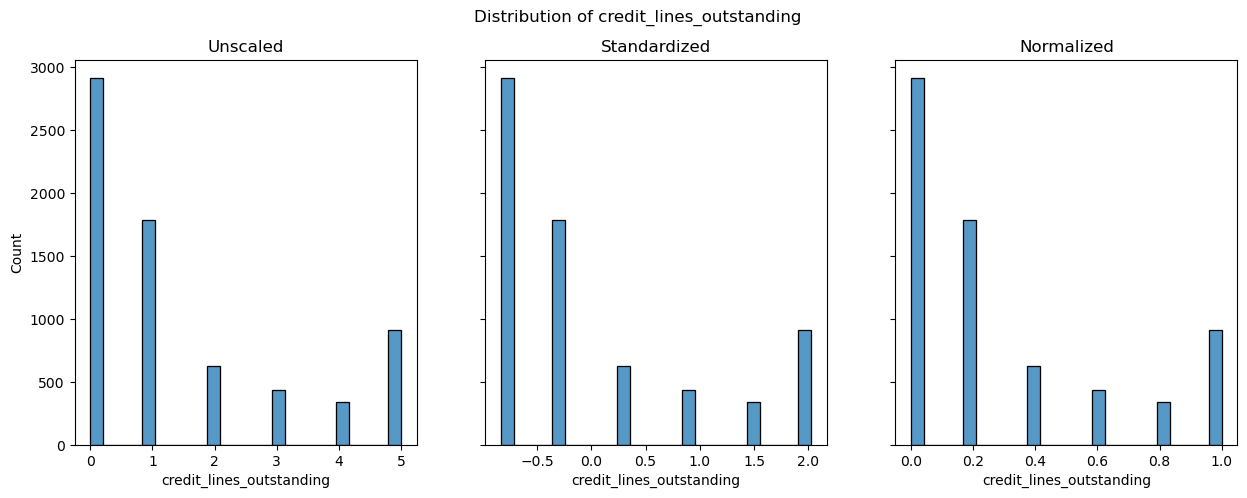

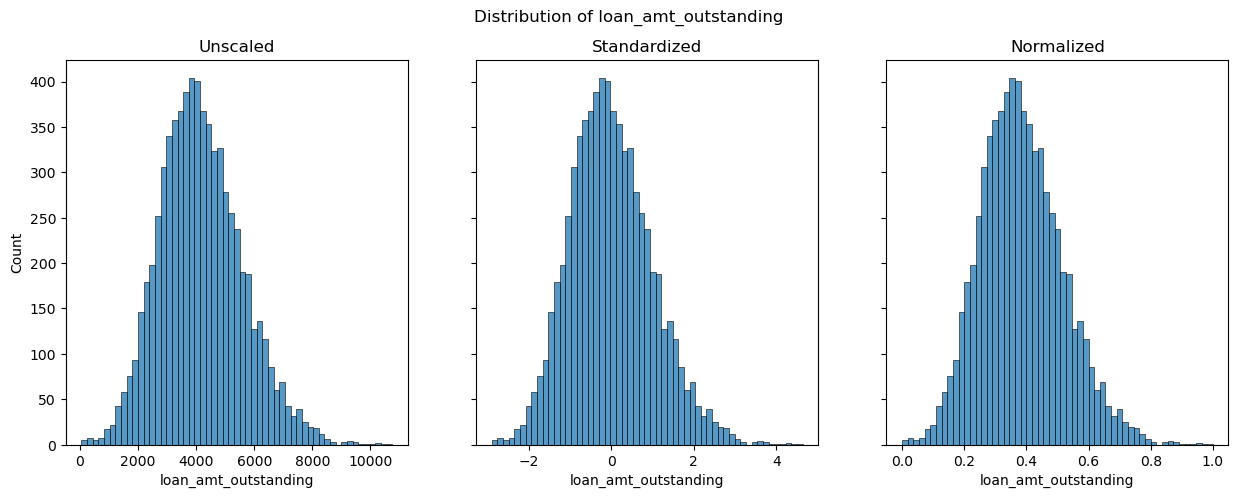

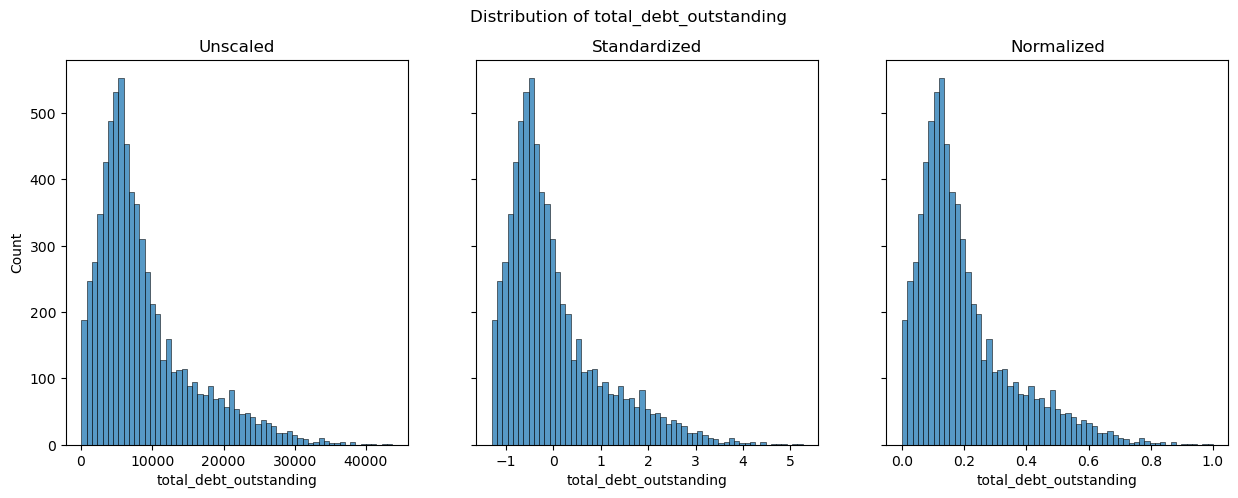

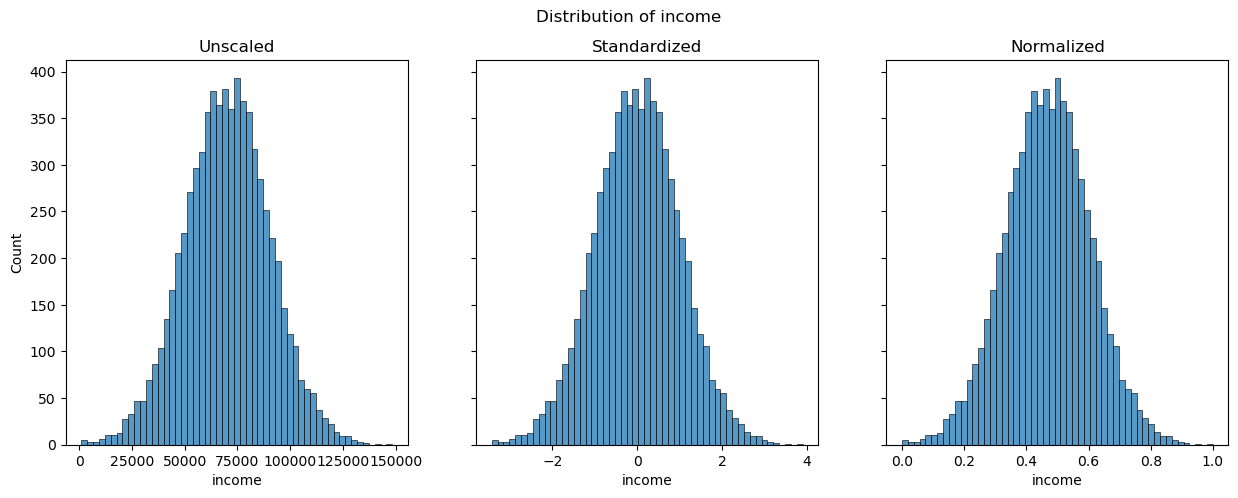

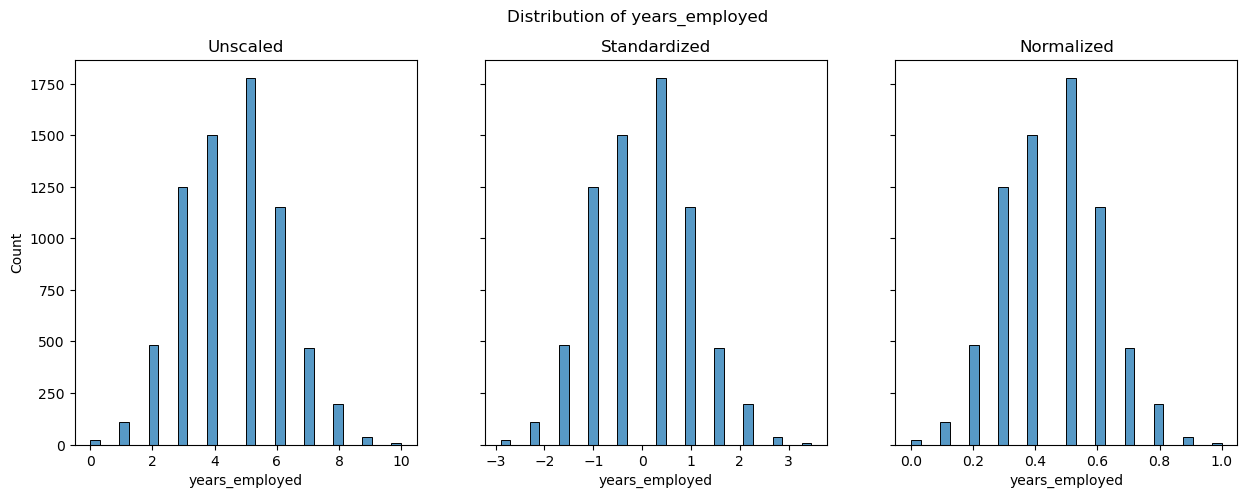

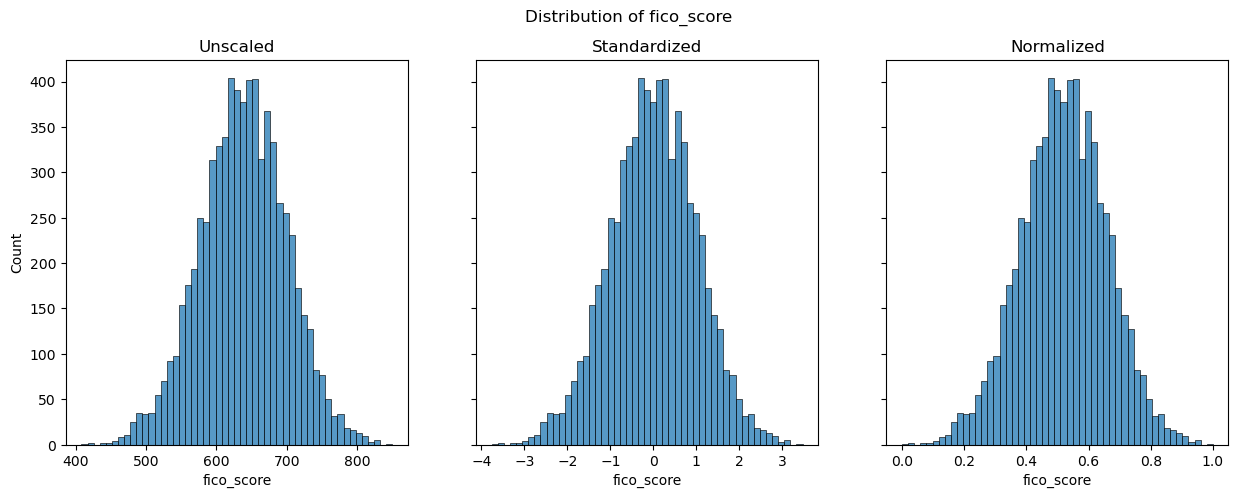

In [9]:
# Compare the effects of different scalings
for column in list(X_train.columns):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    fig.suptitle('Distribution of ' + column)

    # Unscaled
    sns.histplot(ax=axes[0], data=X_train[column])
    axes[0].set_title('Unscaled')

    # Standardized
    sns.histplot(ax=axes[1], data=X_train_stan[column])
    axes[1].set_title('Standardized')

    # Normalized
    sns.histplot(ax=axes[2], data=X_train_norm[column])
    axes[2].set_title('Normalized')

Visually, the differences are slight. However, we are reassured that the scaling worked as could be seen from the X-axes.

In [10]:
# Join different scalings of train dataframes
X_train_scaled = X_train.join(X_train_stan, rsuffix='_stan')
X_train_scaled = X_train_scaled.join(X_train_norm,  rsuffix='_norm')
train_scaled = X_train_scaled.join(y_train)
train_scaled.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,credit_lines_outstanding_stan,loan_amt_outstanding_stan,total_debt_outstanding_stan,income_stan,years_employed_stan,fico_score_stan,credit_lines_outstanding_norm,loan_amt_outstanding_norm,total_debt_outstanding_norm,income_norm,years_employed_norm,fico_score_norm,default
906,0,3066.012991,4088.408910,62090.43416,3,619,-0.835937,-0.770267,-0.695067,-0.393287,-0.988435,-0.307341,0.0,0.281839,0.092392,0.414419,0.3,0.477376,0
8841,1,3615.966492,5520.055959,62090.71989,5,639,-0.263321,-0.383727,-0.479970,-0.393273,0.285204,0.019814,0.2,0.333234,0.125204,0.414421,0.5,0.522624,0
1644,3,5702.346570,15067.143560,77954.83237,3,524,0.881910,1.082706,0.954427,0.394981,-0.988435,-1.861325,0.6,0.528214,0.344015,0.522038,0.3,0.262443,1
1377,1,4224.598684,10228.911200,71962.47797,4,623,-0.263321,0.044056,0.227510,0.097234,-0.351615,-0.241910,0.2,0.390113,0.233127,0.481388,0.4,0.486425,0
8255,1,6982.214944,9115.623310,104349.15850,7,639,-0.263321,1.982274,0.060244,1.706460,1.558844,0.019814,0.2,0.647823,0.207611,0.701090,0.7,0.522624,0


In [11]:
# Do the same for test dataframes
X_test_scaled = X_test.join(X_test_stan, rsuffix='_stan')
X_test_scaled = X_test_scaled.join(X_test_norm,  rsuffix='_norm')
test_scaled = X_test_scaled.join(y_test)
test_scaled.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,credit_lines_outstanding_stan,loan_amt_outstanding_stan,total_debt_outstanding_stan,income_stan,years_employed_stan,fico_score_stan,credit_lines_outstanding_norm,loan_amt_outstanding_norm,total_debt_outstanding_norm,income_norm,years_employed_norm,fico_score_norm,default
4419,4,3931.985813,14852.112790,66286.40225,6,655,1.454525,-0.161610,0.922120,-0.184798,0.922024,0.281538,0.8,0.362767,0.339087,0.442883,0.6,0.558824,1
572,0,3966.069174,1655.512036,63995.26829,4,678,-0.835937,-0.137654,-1.060596,-0.298640,-0.351615,0.657765,0.0,0.365953,0.036632,0.427341,0.4,0.610860,0
1963,1,4727.868166,7231.952443,76459.25915,5,605,-0.263321,0.397784,-0.222767,0.320670,0.285204,-0.536349,0.2,0.437146,0.164439,0.511893,0.5,0.445701,0
7277,2,5839.266254,10086.152230,86469.95026,8,600,0.309294,1.178941,0.206061,0.818080,2.195663,-0.618138,0.4,0.541010,0.229855,0.579802,0.8,0.434389,0
9131,3,4266.952459,10116.064030,56541.96260,5,633,0.881910,0.073825,0.210555,-0.668979,0.285204,-0.078333,0.6,0.394071,0.230541,0.376780,0.5,0.509050,0


In [12]:
# Double check the dataframes before saving
print(train_scaled.info())
print(test_scaled.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 906 to 9201
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   credit_lines_outstanding       7000 non-null   int64  
 1   loan_amt_outstanding           7000 non-null   float64
 2   total_debt_outstanding         7000 non-null   float64
 3   income                         7000 non-null   float64
 4   years_employed                 7000 non-null   int64  
 5   fico_score                     7000 non-null   int64  
 6   credit_lines_outstanding_stan  7000 non-null   float64
 7   loan_amt_outstanding_stan      7000 non-null   float64
 8   total_debt_outstanding_stan    7000 non-null   float64
 9   income_stan                    7000 non-null   float64
 10  years_employed_stan            7000 non-null   float64
 11  fico_score_stan                7000 non-null   float64
 12  credit_lines_outstanding_norm  7000 non-null   floa

In [13]:
# Save the train and test set as csv files
train_scaled.to_csv(path+'train_scaled.csv')
test_scaled.to_csv(path+'test_scaled.csv')
print('files saved!')

files saved!


## 4.5 Summary

At this point the raw data has been validated as well as spilt into train/test sets. Furthermore two scalings (standard and min max) have been performed on the sets, ready for use in modeling.